In [2]:
import pandas as pd

In [5]:
diab = pd.read_csv('pima-indians-diabetes.csv')

In [6]:
diab.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diab.shape

(768, 10)

In [8]:
cols = diab.columns

In [9]:
cols

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [11]:
diab[cols_to_norm] = diab[cols_to_norm].apply(lambda x:(x-x.min()) / (x.max()-x.min() ))

In [12]:
diab.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
diab.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
import tensorflow as tf

In [17]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
diab_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diab_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [18]:
group = tf.feature_column.categorical_column_with_vocabulary_list('Group',{'A','B','C','D'})

In [19]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

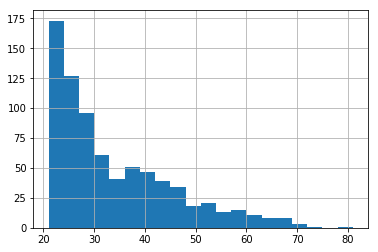

In [23]:
diab['Age'].hist(bins=20)

In [24]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [25]:
feat_cols = [num_preg,plasma_gluc,diab_press,tricep,insulin,bmi,diab_pedigree,assigned_group,age_bucket]  

In [31]:
x_data = diab.drop('Class',axis=1)
labels = diab['Class']

In [32]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [34]:
x_train.shape

(537, 9)

In [35]:
x_test.shape

(231, 9)

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,num_epochs=1000,shuffle=True)

In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': '/tmp/tmpux27maot', '_device_fn': None, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8aa3ced940>, '_global_id_in_cluster': 0, '_save_checkpoints_secs': 600, '_eval_distribute': None, '_num_ps_replicas': 0, '_train_distribute': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_master': '', '_protocol': None, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': 'worker', '_experimental_distribute': None, '_is_chief': True, '_save_checkpoints_steps': None, '_task_id': 0}


In [38]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpux27maot/model.ckpt.
INFO:tensorflow:loss = 88.722855, step = 1
INFO:tensorflow:global_step/sec: 188.131
INFO:tensorflow:loss = 66.37937, step = 101 (0.532 sec)
INFO:tensorflow:global_step/sec: 248.754
INFO:tensorflow:loss = 65.72995, step = 201 (0.404 sec)
INFO:tensorflow:global_step/sec: 235.213
INFO:tensorflow:loss = 65.012825, step = 301 (0.426 sec)
INFO:tensorflow:global_step/sec: 232.146
INFO:tensorflow:loss = 56.997795, step = 401 (0.427 sec)
INFO:t

In [41]:
eval_fn =tf.estimator.inputs.pandas_input_fn(x=x_test,y = y_test,batch_size=10,
                                             num_epochs=1,shuffle=False)

In [43]:
result = model.evaluate(eval_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-01-00:54:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpux27maot/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-01-00:54:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.83469135, auc_precision_recall = 0.6985408, average_loss = 0.48373634, global_step = 1000, label/mean = 0.35064936, loss = 4.6559625, precision = 0.71428573, prediction/mean = 0.35105944, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpux27maot/model.ckpt-1000


In [44]:
result

{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83469135,
 'auc_precision_recall': 0.6985408,
 'average_loss': 0.48373634,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6559625,
 'precision': 0.71428573,
 'prediction/mean': 0.35105944,
 'recall': 0.5555556}

In [45]:

pred_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,num_epochs=1,shuffle=False)

In [46]:
predictions = model.predict(pred_func)

In [47]:
preds = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpux27maot/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
preds

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.48614135], dtype=float32),
  'logits': array([-0.05544877], dtype=float32),
  'probabilities': array([0.5138587 , 0.48614138], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.7412629], dtype=float32),
  'logits': array([1.0525432], dtype=float32),
  'probabilities': array([0.25873703, 0.7412629 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.25007784], dtype=float32),
  'logits': array([-1.0981972], dtype=float32),
  'probabilities': array([0.74992216, 0.2500778 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3431362], dtype=float32),
  'logits': array([-0.64934933], dtype=float32),
  'probabilities': array([0.6568638 , 0.34313616], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=o

## DNN Model

In [61]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': '/tmp/tmp_2jxj5as', '_device_fn': None, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8aa360fb00>, '_global_id_in_cluster': 0, '_save_checkpoints_secs': 600, '_eval_distribute': None, '_num_ps_replicas': 0, '_train_distribute': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_master': '', '_protocol': None, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': 'worker', '_experimental_distribute': None, '_is_chief': True, '_save_checkpoints_steps': None, '_task_id': 0}


In [51]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,
                                                        dimension=4)


In [52]:
feat_cols = [num_preg,plasma_gluc,diab_press,tricep,insulin,bmi,diab_pedigree,embedded_group_col,age_bucket]  

In [54]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,
                                                 batch_size=10,num_epochs=1000
                                                ,shuffle=True)

In [66]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_model_dir': '/tmp/tmpxyfusryj', '_device_fn': None, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8a8e3ff470>, '_global_id_in_cluster': 0, '_save_checkpoints_secs': 600, '_eval_distribute': None, '_num_ps_replicas': 0, '_train_distribute': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_master': '', '_protocol': None, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': 'worker', '_experimental_distribute': None, '_is_chief': True, '_save_checkpoints_steps': None, '_task_id': 0}


In [ ]:
dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.


In [ ]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test
                                                   ,batch_size=1,shuffle=False)

In [65]:
dnn_model.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-01-01:07:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp59_phjsv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-01-01:07:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.8216872, auc_precision_recall = 0.6934641, average_loss = 0.5115311, global_step = 1000, label/mean = 0.35064936, loss = 0.5115311, precision = 0.6145833, prediction/mean = 0.4069411, recall = 0.72839504
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp59_phjsv/model.ckpt-1000


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8216872,
 'auc_precision_recall': 0.6934641,
 'average_loss': 0.5115311,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 0.5115311,
 'precision': 0.6145833,
 'prediction/mean': 0.4069411,
 'recall': 0.72839504}